In [1]:
%reset
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import eigs
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
from matplotlib.pyplot import cm
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Computing QG modes at an individual gridbox.

In [8]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# ##Increasing GM and BS

##Contains default setup based on Jansen et al 2019. MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
# av_05_GMBS0 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.3
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
av_05_GMBS5 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.5; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test6
# av_05_GMBS6 = xr.open_dataset('averages_00031502.nc', decode_times=False) 

## MEKE_VISCOSITY_COEFF_KU = -0.8; MEKE_KHCOEFF = 0.8
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
av_05_GMBS13 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

##Increasing BS

## MEKE_VISCOSITY_COEFF_KU = -0.1; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test26
# av_05_BS26 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test15
# av_05_BS15 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


## MEKE_VISCOSITY_COEFF_KU = -0.2; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
# av_05_BS27 = xr.open_dataset('averages_00031502.nc', decode_times=False) 

## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.0
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
av_05_BS16 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


# ##Increasing GM

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test24
# av_05_GM24 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
av_05_GM25 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
# av_05_GM7 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.6
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test8
# av_05_GM8 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


##GME RUNS:
## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with advection and dissipation of MEKE
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test1
av_05_GME1 = xr.open_dataset('averages_00031502.nc', decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with NO advection and dissipation of MEKE
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test2
av_05_GME2 = xr.open_dataset('averages_00031502.nc', decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3 with advection and dissipation of MEKE, additional filtering (5 passes vs. 1 in test1&2)
%cd /glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test3
av_05_GME3 = xr.open_dataset('averages_00031502.nc', decode_times=False)



/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test5
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test13
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
/glade/p/univ/unyu0004/eyankovsky/GME_testing/GME_test1
available_diags.000000  longmean_00012250.nc      MOM_input
averages_00030002.nc    longmean_00014250.nc      MOM_layout
averages_00030502.nc    longmean_00015250.nc      MOM_override
averages_00031002.nc    longmean_00016250.nc      MOM_parameter_doc.all
averages_00031502.nc    longmean_00018250.nc      MOM_parameter_doc.debugging
CPU_stats               longmean_00020250.nc      MOM_parameter_doc.layout
diag_table@             longmean_00022250.nc      MOM_parameter_doc.short
diag_table.final        longmean_00024250.nc      ocean_geometry.nc
diag_table_GME.final    longmean_00026250.nc      ocean.stats
diag_table.init       

In [35]:
#Read in various grid variables from the static file and forcing:
lon=fs_05['geolon']; lat=fs_05['geolat']
depth = fs_05['depth_ocean']

xh = fs_05.xh.values
yh = fs_05.yh.values

grid= Grid(av_05, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

u = grid.interp(av_05_BS16.u[-1,0,:],axis='X')
v = grid.interp(av_05_BS16.v[-1,0,:],axis='Y')


dvdx = v.differentiate('xh')*360/(6370000*2*np.pi*np.cos(lat*np.pi/180))
dudy = u.differentiate('xh')*360/(6370000*2*np.pi)
vorticity = dvdx-dudy

In [36]:
depth.shape

(280, 120)

In [41]:
#1/4 degree:560 lat x 240 lon 
#60,460 in 1/4 degree is nominal analysis point!
index_lon=30; index_lat=40 #1/4 degree: (60,460), (120,160), (60,80), (120,80), (200,80)

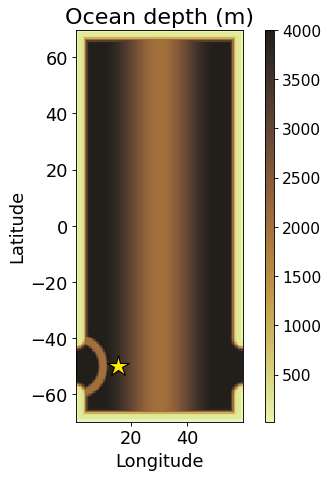

In [42]:
#Plotting ocean depth
fig = plt.figure(figsize=(4, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Ocean depth (m)',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,depth,cmap=cmocean.cm.turbid)
ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=20,markeredgecolor='k',markerfacecolor='#FFE900')
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

Text(0.5, 1.0, '$1/2^\\circ$ MEKE+BS')

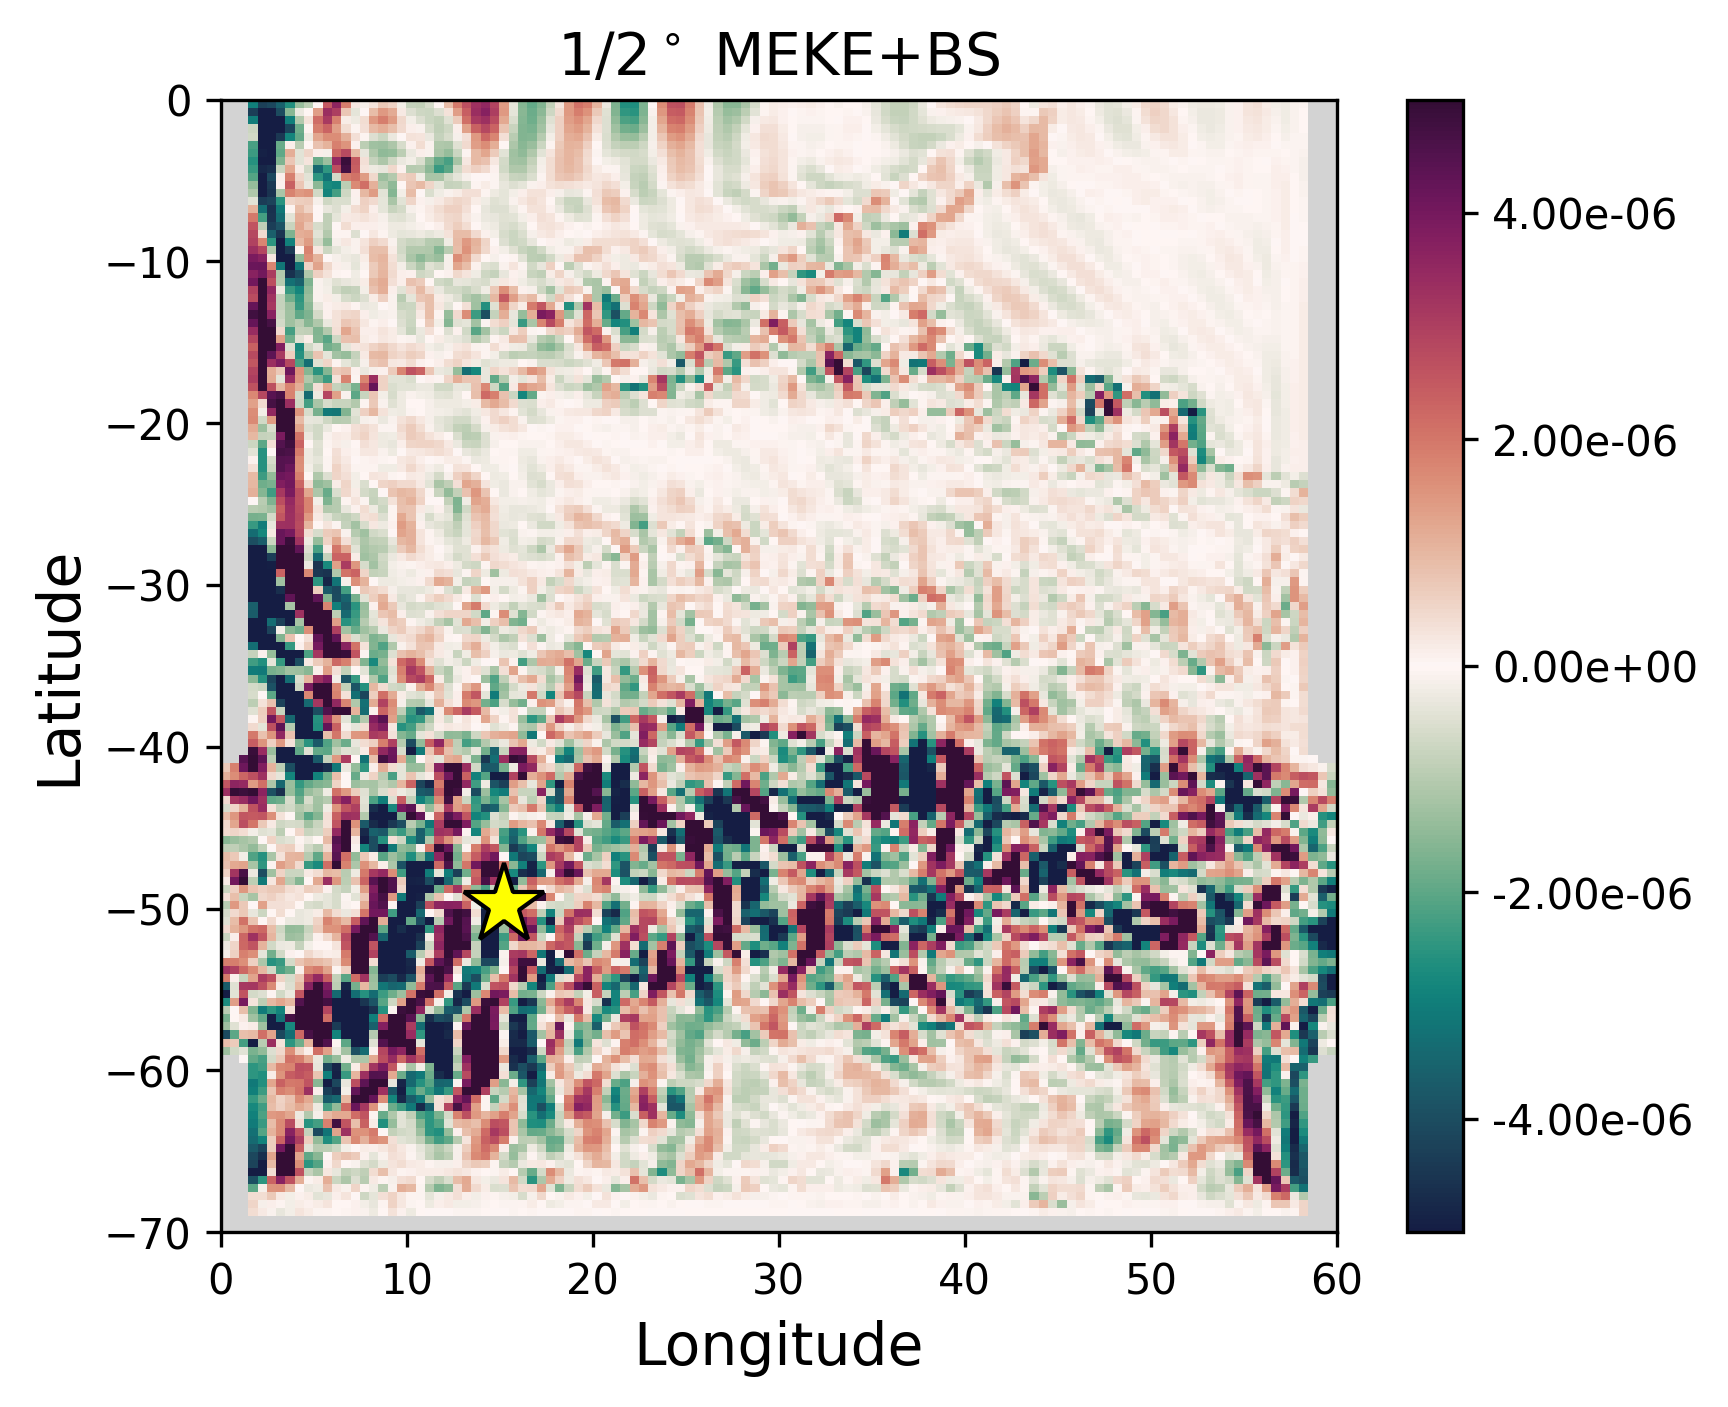

In [43]:
fig = plt.figure(figsize=(6, 5), dpi= 300, facecolor='w', edgecolor='k')

plot1=vorticity.plot(vmin=-.5e-5,vmax=.5e-5,cmap=cmocean.cm.curl,add_colorbar=False,xlim=[0,60],ylim=[-70,0])
plt.colorbar(plot1, format='%.2e')
plt.plot(lon[index_lat,index_lon],lat[index_lat,index_lon],'*',markerfacecolor=[1,1,0],markeredgecolor='k',Markersize=20)

current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('$1/2^\circ$ MEKE+BS',fontsize=14)
#
# plot1.set_xlim([-100,0])
# plot1.set_ylim([-80,-20])

In [ ]:
fig = plt.figure(figsize=(6, 5), dpi= 300, facecolor='w', edgecolor='k')

plot1=vorticity.plot(vmin=-.5e-5,vmax=.5e-5,cmap=cmocean.cm.curl,add_colorbar=False,xlim=[0,60],ylim=[-70,0])
plt.colorbar(plot1, format='%.2e')
plt.plot(lon[index_lat,index_lon],lat[index_lat,index_lon],'*',markerfacecolor=[1,1,0],markeredgecolor='k',Markersize=20)

current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('$1/2^\circ$ MEKE+GM+BS Extreme Values',fontsize=14)
#
# plot1.set_xlim([-100,0])
# plot1.set_ylim([-80,-20])